In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [230]:
df_train = pd.read_csv(r'F:\ML\Titanic\train.csv')
df_test = pd.read_csv(r'F:\ML\Titanic\test.csv')


In [231]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [233]:
print(df_train.isnull().sum(),'\n',
     df_train.shape)
print('- '*40)
print(df_test.isnull().sum(),'\n',
     df_test.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 (891, 12)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 
 (418, 11)


In [234]:
df_train.shape

(891, 12)

In [235]:
def bar_chart(feature):
    survived = df_train[df_train['Survived'] == 1][feature].value_counts()
    dead = df_train[df_train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind = 'bar',stacked = True, figsize = (10,5))

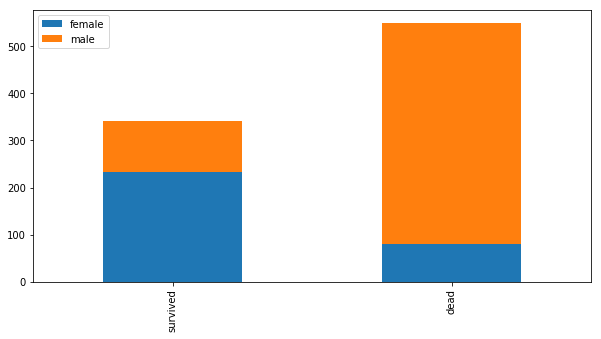

In [236]:
bar_chart('Sex')

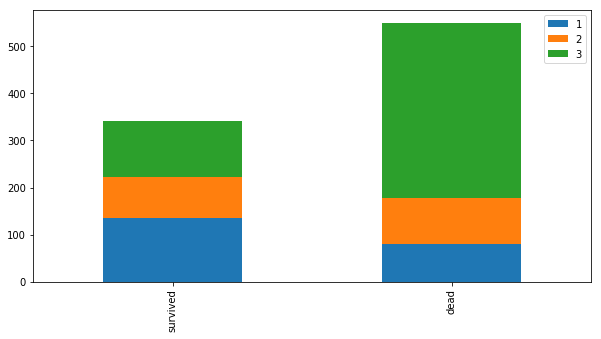

In [237]:
bar_chart('Pclass')

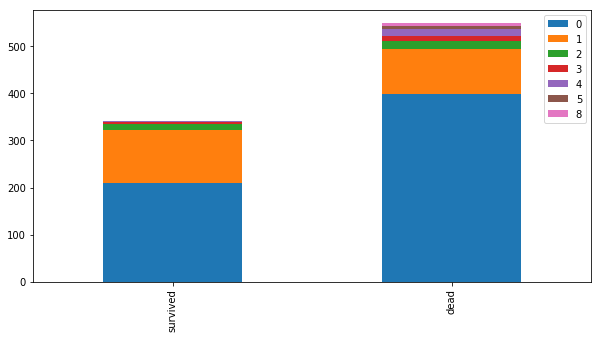

In [238]:
bar_chart('SibSp')

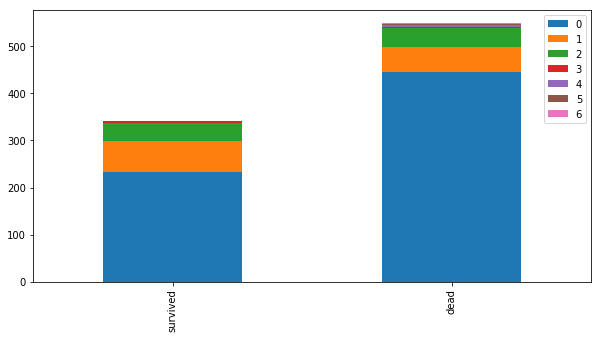

In [239]:
bar_chart('Parch')

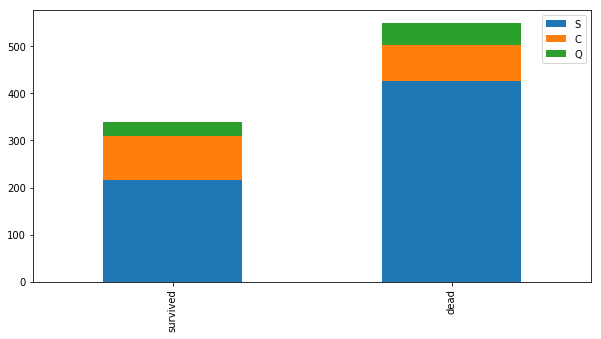

In [240]:
bar_chart('Embarked')

In [241]:
df_train_test = [df_train,df_test]
for dataset in df_train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

In [242]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Countess      1
Don           1
Ms            1
Lady          1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [243]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [244]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in df_train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [245]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [246]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


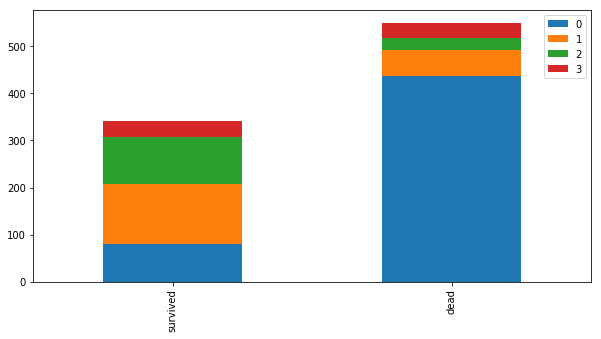

In [247]:
bar_chart('Title')

In [248]:
df_train.drop('Name',axis = 1,inplace = True)

In [249]:
df_test.drop('Name', axis=1, inplace=True)

In [250]:
sex_mapping = {'male':0,'female':1}
for dataset in df_train_test:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [251]:
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'),inplace = True)
df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'),inplace = True)

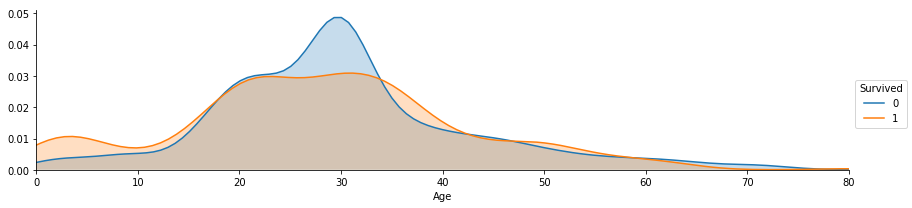

In [252]:
facet = sns.FacetGrid(df_train,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0,df_train['Age'].max()))
facet.add_legend()
plt.show()

(0, 20)

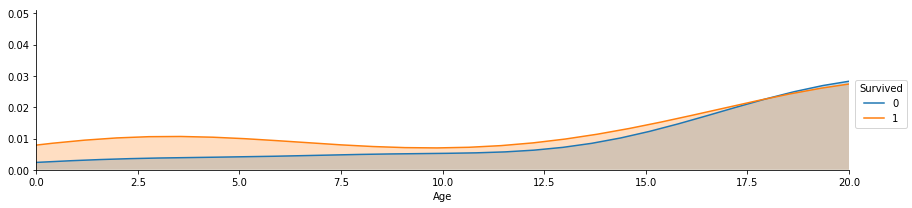

In [253]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

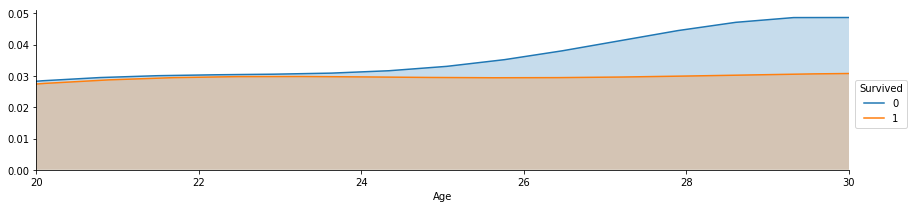

In [254]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30, 40)

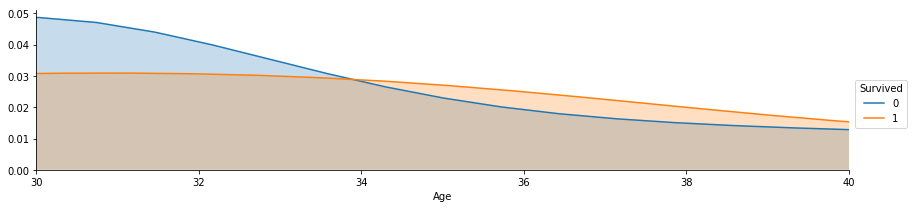

In [255]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

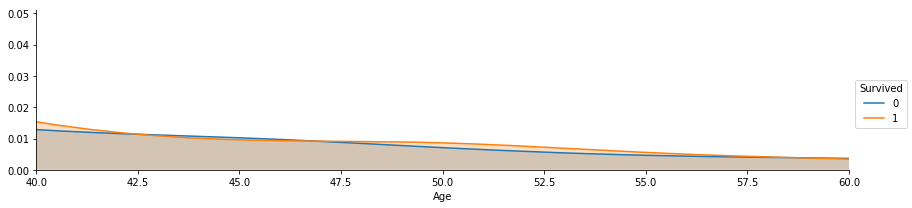

In [256]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80.0)

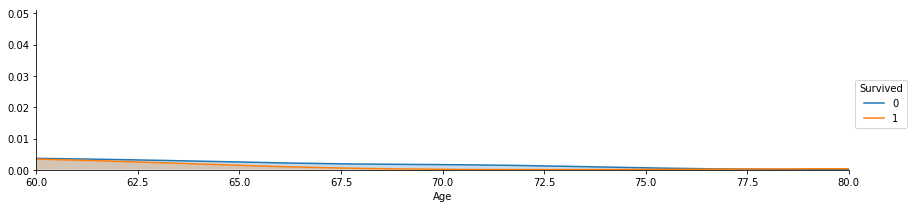

In [257]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [260]:
for dataset in df_train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [261]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


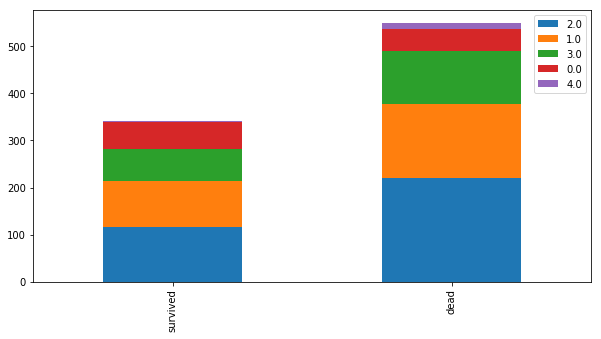

In [262]:
bar_chart('Age')

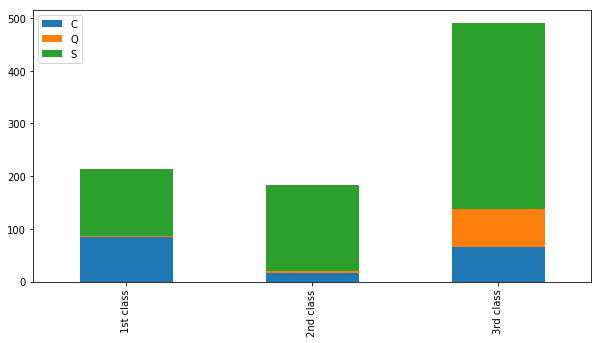

In [263]:
Pclass1 = df_train[df_train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass'] == 3]['Embarked'].value_counts()
df_embarked = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df_embarked.index = ['1st class','2nd class','3rd class']
df_embarked.plot(kind = 'bar',stacked = True,figsize = (10,5))

In [264]:
for dataset in df_train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [265]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in df_train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [266]:
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)


In [267]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

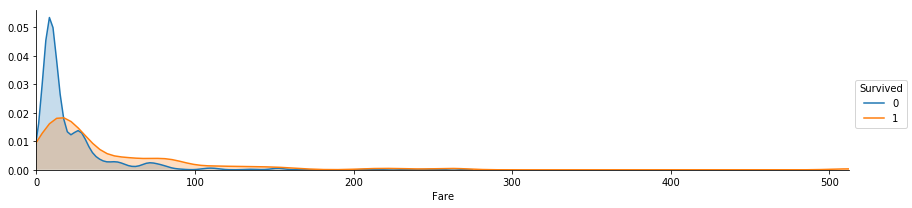

In [268]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 30)

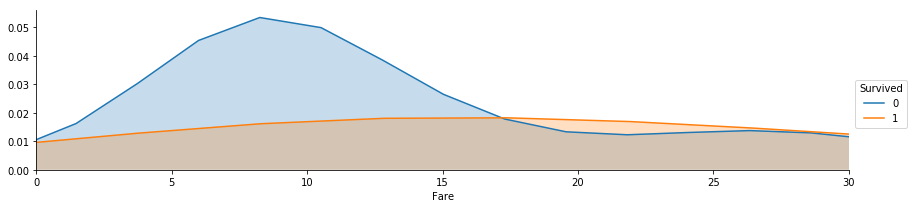

In [269]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

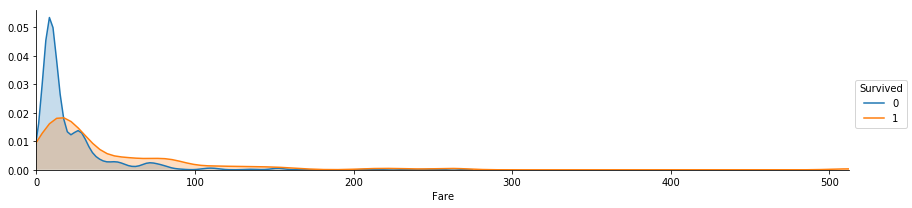

In [270]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [271]:
for dataset in df_train_test:
    dataset.loc[dataset['Fare']<=17,'Fare'] = 0
    dataset.loc[(dataset['Fare']>17) &(dataset['Fare'] <=30),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [272]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [273]:
df_train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
D                  3
F33                3
C22 C26            3
E101               3
F2                 3
D35                2
B28                2
B18                2
C65                2
C126               2
E8                 2
D17                2
E25                2
B49                2
C124               2
C2                 2
E67                2
B57 B59 B63 B66    2
C83                2
B20                2
B51 B53 B55        2
C93                2
B5                 2
C92                2
B58 B60            2
C78                2
B77                2
                  ..
C49                1
B79                1
A36                1
D37                1
D46                1
C118               1
C50                1
B86                1
E10                1
B4                 1
A10                1
B102               1
C101               1
C148               1
B78                1
D15                1
C104         

In [274]:
for dataset in df_train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
df_train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

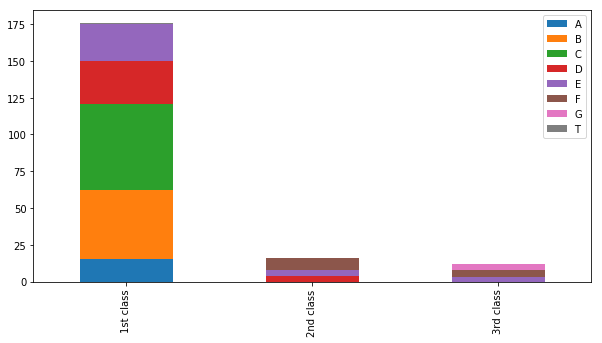

In [275]:
Pclass1 = df_train[df_train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [276]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in df_train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [277]:
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [278]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

(0, 11.0)

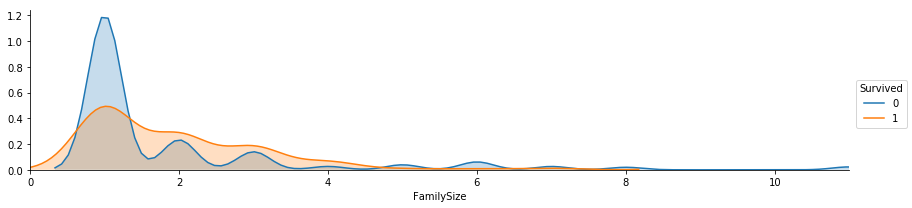

In [279]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, df_train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [280]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in df_train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [281]:
feature_drops = ['Ticket','Parch','SibSp']
df_train = df_train.drop(feature_drops,axis =1)
df_test = df_test.drop(feature_drops,axis = 1)

In [282]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [283]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [284]:

df_train = df_train.drop(['PassengerId'], axis=1)
train_data = df_train.drop('Survived', axis=1)
target = df_train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits= 10,shuffle = True,random_state = 0)

kNN

In [156]:
clf = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv = k_fold,n_jobs =1,scoring = scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.84269663 0.87640449 0.83146067
 0.82022472 0.79775281 0.82022472 0.85393258]


In [157]:
round(np.mean(score)*100,2)

82.94

DecisionTree

In [163]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.76666667 0.82022472 0.78651685 0.7752809  0.8988764  0.75280899
 0.84269663 0.82022472 0.74157303 0.79775281]


80.03

Ramdom Forest

In [164]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.84269663 0.84269663 0.7752809  0.88764045 0.83146067
 0.80898876 0.82022472 0.76404494 0.82022472]


81.82

Naive Bayes

In [165]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

SVM

In [167]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


83.5

Tseting

In [168]:
clf = SVC()
clf.fit(train_data,target)
test_data= df_test.copy()
prediction = clf.predict(test_data)

In [288]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [292]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
